[View in Colaboratory](https://colab.research.google.com/github/maddy46/Maddy_mlblr/blob/master/4a_assignment.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


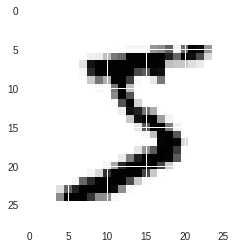

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert01-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 3))
model.add(Convolution2D(10, 3))
model.add(Convolution2D(10, 3))
model.add(Convolution2D(10, 3))
model.add(Convolution2D(10, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        2890      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 10)        910       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 10)        910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 10)        910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 10)        910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 10)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.2752 - acc: 0.9148
Epoch 2/10
35328/60000 [================>.............] - ETA: 11s - loss: 0.0992 - acc: 0.9699

60000/60000 [==============================] - 27s 445us/step - loss: 0.0921 - acc: 0.9717
Epoch 3/10
57056/60000 [===========================>..] - ETA: 1s - loss: 0.0729 - acc: 0.9768

60000/60000 [==============================] - 27s 444us/step - loss: 0.0731 - acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.0664 - acc: 0.9796
Epoch 5/10
 4192/60000 [=>............................] - ETA: 25s - loss: 0.0537 - acc: 0.9835

60000/60000 [==============================] - 27s 444us/step - loss: 0.0598 - acc: 0.9817
Epoch 6/10
42976/60000 [====================>.........] - ETA: 7s - loss: 0.0563 - acc: 0.9823

60000/60000 [==============================] - 27s 445us/step - loss: 0.0564 - acc: 0.9825
Epoch 7/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0541 - acc: 0.9830
Epoch 8/10


60000/60000 [==============================] - 27s 445us/step - loss: 0.0508 - acc: 0.9839
Epoch 9/10
41088/60000 [===================>..........] - ETA: 8s - loss: 0.0491 - acc: 0.9842

60000/60000 [==============================] - 27s 446us/step - loss: 0.0494 - acc: 0.9843
Epoch 10/10
59296/60000 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9851

60000/60000 [==============================] - 27s 447us/step - loss: 0.0471 - acc: 0.9851


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.03644976737725083, 0.9879]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[1.35302408e-10 6.08074077e-11 2.81945791e-08 5.72007448e-05
  1.68103284e-13 2.28002879e-08 7.35683531e-16 9.99940991e-01
  2.69755589e-07 1.52971757e-06]
 [1.15016337e-05 1.37215022e-06 9.99985337e-01 5.99407413e-09
  1.01084896e-11 1.12326634e-10 1.49508776e-06 2.12678659e-12
  2.89323424e-07 7.56096991e-11]
 [1.37199848e-07 9.99875307e-01 1.11411191e-05 7.47865503e-09
  6.73232789e-05 2.72104785e-07 2.38095524e-07 4.36626906e-05
  1.32902778e-06 6.15992917e-07]
 [9.99845982e-01 6.28118607e-12 4.66882142e-07 9.70172498e-10
  4.92214269e-09 2.45232314e-08 1.53066096e-04 7.12864767e-11
  5.08548851e-07 1.41402401e-08]
 [1.83875826e-09 1.75900433e-10 1.01938893e-08 1.12523039e-10
  9.99987125e-01 7.60829288e-10 1.85447142e-08 1.00354364e-10
  2.89816467e-06 9.96098333e-06]
 [1.23196870e-07 9.99811113e-01 6.70091640e-06 1.41537160e-09
  2.44204512e-05 3.76829128e-08 1.26912681e-07 1.47168990e-04
  3.64615516e-06 6.76139916e-06]
 [8.39436246e-12 1.48055401e-09 7.59583152e-09 1.23708921e

In [25]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

{'conv2d_18': <keras.layers.convolutional.Conv2D object at 0x7f57b2e30940>, 'conv2d_19': <keras.layers.convolutional.Conv2D object at 0x7f57b2e309b0>, 'conv2d_20': <keras.layers.convolutional.Conv2D object at 0x7f57b2e30cf8>, 'conv2d_21': <keras.layers.convolutional.Conv2D object at 0x7f57b2e35550>, 'conv2d_22': <keras.layers.convolutional.Conv2D object at 0x7f57b2de2128>, 'conv2d_23': <keras.layers.convolutional.Conv2D object at 0x7f57b2d8b128>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0x7f57b2da2b00>, 'conv2d_24': <keras.layers.convolutional.Conv2D object at 0x7f57b2df5a58>, 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D object at 0x7f57b2d649b0>, 'conv2d_25': <keras.layers.convolutional.Conv2D object at 0x7f57b2d52630>, 'flatten_2': <keras.layers.core.Flatten object at 0x7f57b2d11e80>, 'activation_2': <keras.layers.core.Activation object at 0x7f57b2d23fd0>}


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5787632780>


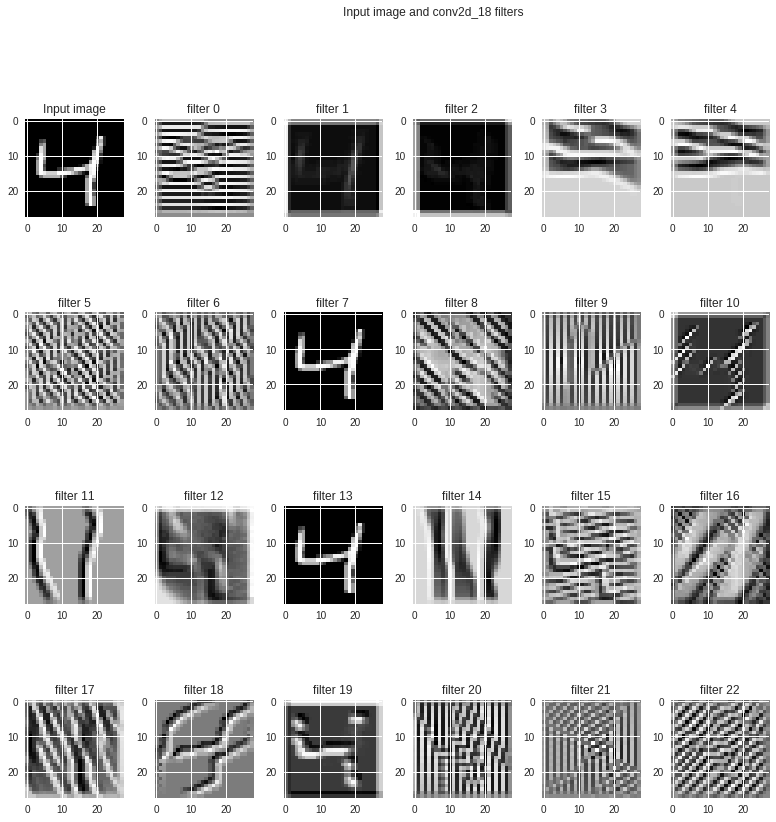

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_18'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    print (ax)
    ax[0,0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0,0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()